In [1]:
# Importemos todo lo que vamos a usar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xlrd

%matplotlib inline

from bs4 import BeautifulSoup
from datetime import datetime
from scipy import optimize


def read_excel_xml(path):
    file = open(path, encoding='ISO-8859-1').read()
    soup = BeautifulSoup(file,'xml')
    workbook = []
    for sheet in soup.findAll('Worksheet'): 
        sheet_as_list = []
        for row in sheet.findAll('Row'):
            row_as_list = []
            for cell in row.findAll('Cell'):
                row_as_list.append(cell.Data.text)
            sheet_as_list.append(row_as_list)
        workbook.append(sheet_as_list)
    return workbook

Vamos a obtener los datos desde la [página de Bolsar](https://www.bolsar.com/Vistas/Herramientas/PaginaDescargaSeriesHistoricas.aspx).

<img src="sampledata.png">

In [2]:
# Leer el archivo y obtener el primer elemento (toda la info)
lista = read_excel_xml('acciones20150101-20180912.xls')
lista = lista[0]

TypeError: 'encoding' is an invalid keyword argument for this function

In [4]:
# Obtener nombres de las acciones
nombres = [lista[i][0] for i in range(len(lista))]
nombres = set(nombres)
nombres.remove(u'Especie')
nombres = list(nombres)

In [5]:
# Crear el DataFrame a partir de los datos que obtuvimos, usando uno de los tickers
# como referencia y después ir agregando fechas a partir de eso.

df = pd.DataFrame(lista[1:], columns=lista[0])
finaldf = df[df[u'Especie'] == u'AGRO'][[u'Fecha']]
finaldf.columns = [u'Fecha']
finaldf = finaldf.set_index(u'Fecha')
for i in nombres:
    tempdf = df[df[u'Especie'] == i][[u'Fecha', u'Cierre del día']]
    tempdf.columns = [u'Fecha', i]
    finaldf = finaldf.join(tempdf.set_index(u'Fecha'),how='outer')

# Fijar la colección de fechas como índice
idx = df[df[u'Especie'] == u'GGAL'][[u'Fecha']].set_index(u'Fecha')

# Si queremos guardar el DF generado en un csv, usar comando de abajo
# finaldf.to_csv('acciones.csv')

In [6]:
finaldf.head(20)

,TECO2,CGPA2,EDSH,GGAL,CEPU,OEST,TGNO4,BOLT,STD,TGLT,...,AUSO,FRAN,VALO,HARG,BYMA,PAMP,FIPL,DYCA,MOLA,MOLI
Fecha,,,,,,,,,,,,,,,,,,,,,
01/02/2016,39.112,7.050,NaN,38.638,10.512,NaN,7.548,1.739,52.401,NaN,...,16.543,90.138,NaN,11.508,NaN,12.450,2.723,18.000,NaN,73.000
01/02/2017,59.222,16.200,NaN,49.242,24.549,22.165,16.478,2.364,81.582,15.000,...,60.462,95.945,NaN,34.055,NaN,30.250,6.468,39.900,NaN,100.000
01/02/2018,138.694,95.900,NaN,132.772,41.066,38.243,77.159,6.907,135.821,25.300,...,117.627,158.986,8.611,109.521,350.948,54.650,8.720,55.500,186.000,64.800
01/03/2016,50.784,7.700,NaN,46.337,11.134,5.311,7.450,1.812,58.124,NaN,...,17.314,111.195,NaN,13.012,NaN,13.950,2.771,20.000,NaN,86.850
01/03/2017,62.030,34.500,NaN,50.678,24.408,20.744,18.747,2.820,79.706,14.950,...,60.281,86.593,NaN,33.462,NaN,29.100,6.583,38.000,NaN,94.400
01/03/2018,127.303,86.800,NaN,122.796,32.911,33.115,68.279,6.005,138.244,19.100,...,122.426,151.274,7.516,107.791,351.745,49.750,7.800,52.000,166.500,55.500
01/04/2015,47.109,NaN,NaN,27.703,NaN,2.835,3.996,1.067,75.490,11.150,...,7.479,78.261,NaN,8.099,NaN,8.480,2.117,7.600,NaN,42.636
01/04/2016,44.860,7.950,NaN,40.663,11.530,9.888,7.598,1.808,57.229,15.800,...,23.477,94.074,NaN,16.376,NaN,12.650,3.511,19.800,NaN,91.000
01/06/2015,39.286,NaN,NaN,23.439,NaN,NaN,3.700,0.937,71.507,10.200,...,7.886,61.133,NaN,8.586,NaN,6.650,NaN,9.590,NaN,35.800


In [7]:
finaldf.plot(figsize=(16,9))

TypeError: Empty 'DataFrame': no numeric data to plot

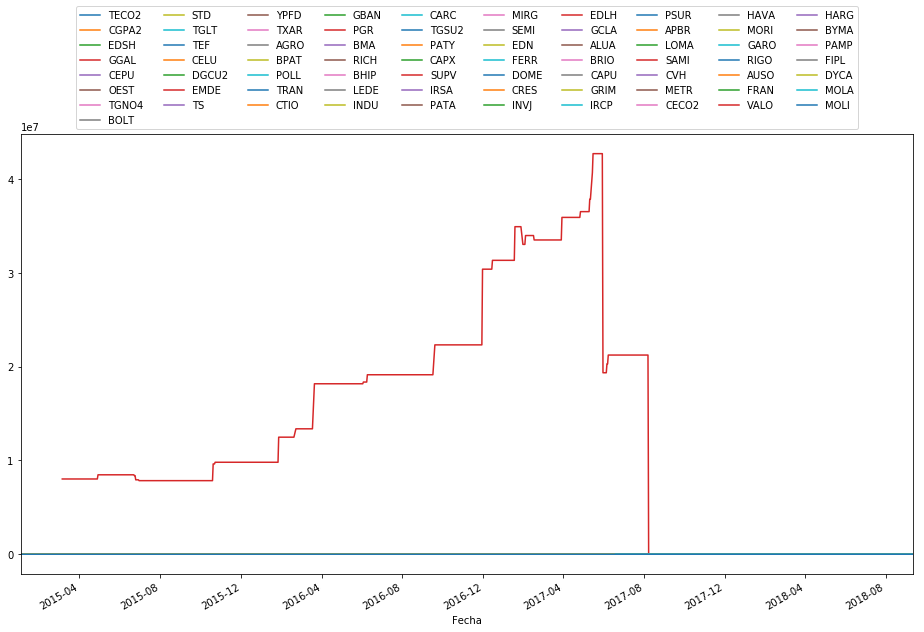

In [8]:
# Hacer que el índice sean realmente fechas
finaldf.index = pd.to_datetime(finaldf.index,format='%d/%m/%Y')
# Hacer que los datos sean realmente numéricos
finaldf = finaldf.apply(pd.to_numeric)
# Reordenar el índice por fecha y luego completar los momentos en los que no se compró/vendió cada acción
finaldf.sort_index(inplace=True)
finaldf.fillna(method='ffill',inplace=True)
finaldf.plot(figsize=(16,9))
plt.legend(ncol=10, loc='upper center', bbox_to_anchor=(0.5, 1.3))


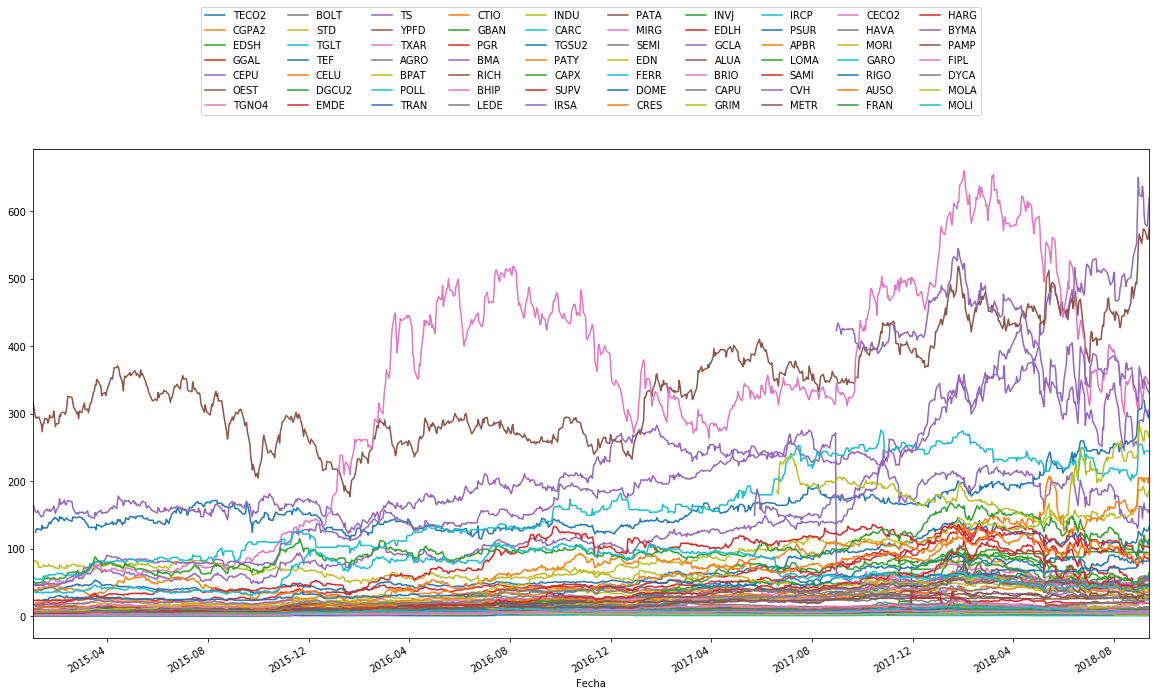

In [9]:
# VALO tiene mal los precios, vamos a tener que seguir sin esa acción
finaldf.drop('VALO', axis=1, inplace=True)
finaldf.plot(figsize=(20,10))
plt.legend(ncol=10, loc='upper center', bbox_to_anchor=(0.5, 1.3))


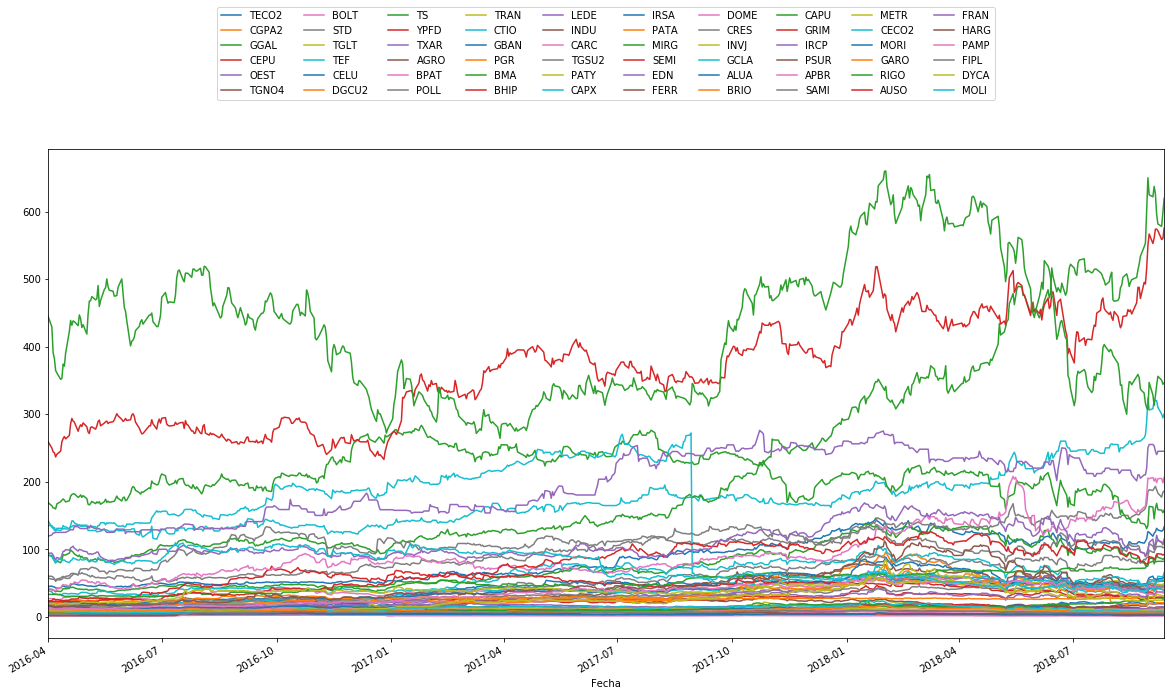

In [10]:
# Vamos a tener datos más uniformes, usemos sólo desde el segundo semestre de 2016
using = []
for ticker in finaldf.columns:
    if finaldf[ticker].first_valid_index() <= datetime(2016,4,1):
        using.append(ticker)
finaldf = finaldf.loc[datetime(2016,4,1):, using]
finaldf.plot(figsize=(20,10))
plt.legend(ncol=10, loc='upper center', bbox_to_anchor=(0.5, 1.3))


__Qué pasó en agosto de 2017?__

__[Las acciones de Cablevisión Holding comenzaron a cotizar en el mercado y pasaron a tener la mayor parte de Grupo Clarín](https://www.cronista.com/negocios/La-accion-de-Cablevision-Holding-comienza-a-cotizar-en-el-mercado-20170830-0010.html)__


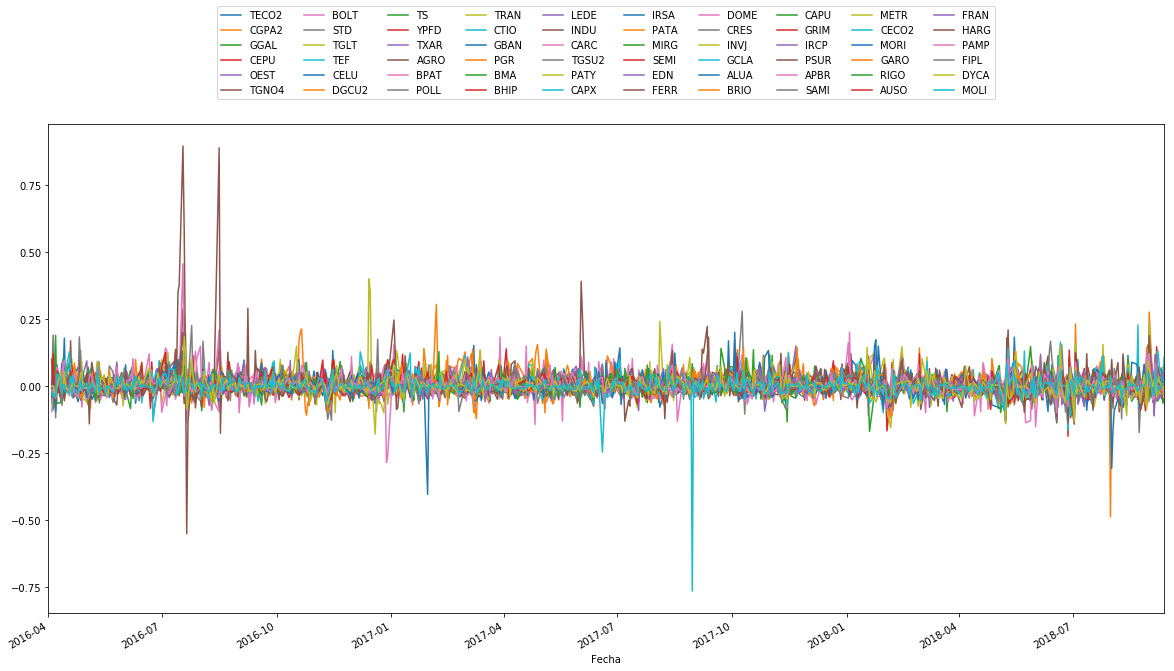

In [11]:
# Los datos no son muy comparables, vamos a usar incrementos porcentuales
final_percentages = finaldf.pct_change()
final_percentages.plot(figsize=(20,10))
plt.legend(ncol=10, loc='upper center', bbox_to_anchor=(0.5, 1.25))


Vamos a proponer nuestra estrategia de inversión:

- Para cada día, vamos a obtener el __promedio de los últimos 60 días__ de la variación porcentual de cada acción (r_i).
- También vamos a obtener la __matriz de covarianzas__ de cada fecha para un promedio de 60 días (Cov_i).
- Vamos a maximizar la función cuadrática $f(x) = x^T*r_i - \gamma * x^T * Cov_i * x$, siguiendo la línea de MPT (queremos maximizar el retorno pero al mismo tiempo minimizar la variabilidad de nuestra inversión).
- Comenzamos con una cantidad de dinero $X$ y el primer día usamos todo ese dinero para crear nuestro portfolio.
- Por cada día que pase, vendemos nuestra tenencia entera al final del día al precio de cierre y compramos el nuevo portfolio que hayamos calculado, también al precio de cierre.

In [12]:
# Empecemos a trabajar con el DF de retornos porcentuales
# len(final_percentages.index)
rolling_mean_returns = final_percentages.rolling(60).mean()
strategy_start_date = rolling_mean_returns.first_valid_index()
rolling_mean_returns = rolling_mean_returns.loc[strategy_start_date:]
rolling_mean_returns.head()

,TECO2,CGPA2,GGAL,CEPU,OEST,TGNO4,BOLT,STD,TGLT,TEF,...,MORI,GARO,RIGO,AUSO,FRAN,HARG,PAMP,FIPL,DYCA,MOLI
Fecha,,,,,,,,,,,,,,,,,,,,,
2016-06-29,0.001828,-0.000623,0.002189,0.000313,0.001264,-0.000724,0.000547,-0.000559,0.005161,-0.001871,...,-0.001024,0.002351,-0.001347,0.001896,0.001334,0.002255,0.004521,0.003259,0.003904,-0.001171
2016-06-30,0.001771,-0.000925,0.002253,0.000075,0.000456,-0.001192,0.001668,-0.000010,0.005794,-0.000414,...,-0.000750,0.002859,-0.001310,0.001508,0.001255,0.003017,0.004836,0.003259,0.003836,-0.000804
2016-07-01,0.002112,-0.001535,0.002786,0.000417,-0.001421,-0.000747,0.002180,0.000158,0.004902,0.000215,...,-0.000648,0.003189,-0.001310,0.000719,0.001826,0.002888,0.005664,0.003628,0.004006,0.000450
2016-07-04,0.001912,-0.000854,0.003098,0.000952,0.000726,0.000293,0.002732,0.000547,0.005124,0.000472,...,0.000946,0.003369,-0.001310,0.002788,0.002503,0.004008,0.006307,0.003628,0.004646,0.001727
2016-07-05,0.002255,-0.001062,0.003634,0.001792,0.002817,0.000878,0.003137,0.000809,0.005209,0.000185,...,0.001810,0.003966,-0.001310,0.003342,0.003090,0.004646,0.007277,0.004070,0.005730,0.002936


In [13]:
covariances = final_percentages.rolling(60).cov().loc[strategy_start_date:]
covariances.loc[strategy_start_date]

,TECO2,CGPA2,GGAL,CEPU,OEST,TGNO4,BOLT,STD,TGLT,TEF,...,MORI,GARO,RIGO,AUSO,FRAN,HARG,PAMP,FIPL,DYCA,MOLI
TECO2,0.000520,-0.000140,0.000250,0.000114,-0.000078,0.000105,0.000096,3.336786e-04,7.923499e-05,0.000259,...,0.000172,-5.056200e-05,-0.000083,0.000011,0.000311,0.000085,0.000227,0.000047,0.000009,0.000112
CGPA2,-0.000140,0.000713,-0.000019,-0.000059,0.000072,0.000134,0.000017,-9.698558e-05,6.482648e-05,-0.000030,...,0.000079,3.747546e-05,0.000081,0.000135,0.000031,-0.000083,-0.000091,0.000049,-0.000062,0.000056
GGAL,0.000250,-0.000019,0.000473,0.000182,0.000160,0.000133,0.000158,2.899378e-04,-2.706704e-05,0.000225,...,0.000081,5.792989e-05,-0.000071,0.000066,0.000466,0.000205,0.000346,0.000072,0.000080,0.000191
CEPU,0.000114,-0.000059,0.000182,0.000354,0.000156,0.000125,0.000084,7.102449e-05,3.856650e-05,0.000051,...,0.000075,-1.984836e-05,-0.000090,0.000031,0.000149,0.000109,0.000127,-0.000025,0.000122,0.000015
OEST,-0.000078,0.000072,0.000160,0.000156,0.001095,0.000379,-0.000125,-1.709439e-05,-2.145560e-04,-0.000056,...,0.000104,-9.271455e-05,0.000005,0.000383,0.000142,0.000130,0.000151,0.000101,0.000045,0.000045
TGNO4,0.000105,0.000134,0.000133,0.000125,0.000379,0.000568,-0.000021,3.333238e-04,6.092644e-05,0.000172,...,0.000153,1.064609e-04,0.000015,0.000163,0.000231,0.000192,0.000168,0.000161,0.000167,0.000117
BOLT,0.000096,0.000017,0.000158,0.000084,-0.000125,-0.000021,0.000450,9.830211e-05,1.652710e-05,0.000183,...,0.000204,3.964659e-05,-0.000089,-0.000127,0.000179,0.000073,0.000142,-0.000126,0.000112,0.000082
STD,0.000334,-0.000097,0.000290,0.000071,-0.000017,0.000333,0.000098,9.963623e-04,1.451976e-04,0.000562,...,0.000154,2.617344e-04,-0.000005,0.000156,0.000362,0.000266,0.000355,0.000318,0.000213,0.000316
TGLT,0.000079,0.000065,-0.000027,0.000039,-0.000215,0.000061,0.000017,1.451976e-04,8.336681e-04,0.000116,...,-0.000022,1.260133e-04,0.000017,0.000003,0.000050,0.000146,-0.000054,0.000145,0.000110,0.000101
TEF,0.000259,-0.000030,0.000225,0.000051,-0.000056,0.000172,0.000183,5.620012e-04,1.163121e-04,0.000903,...,0.000130,1.856983e-04,-0.000033,0.000031,0.000288,0.000086,0.000172,0.000201,0.000214,0.000190


In [72]:
# Para cada día de la estrategia, creamos el problema de optimización con SciPy.

ndim = len(rolling_mean_returns.columns)
starting_vector = np.ones(60) / ndim

constraint = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1.0})
boundary = ()
for i in range(ndim):
    boundary = (*boundary, (0, None))

solutions = np.empty((0,ndim))

for ind in rolling_mean_returns.index:
    # Crear vectores de retornos y matriz de covarianzas
    returns = np.array(rolling_mean_returns.loc[ind])
    covariance = np.matrix(covariances.loc[ind])
    # Definir la función a optimizar (como estamos minimizando, hay que usar -f(x))
    def portfolio_function(x):
        return float(- np.dot(returns,x) + 50.0 * np.dot(x, np.dot(covariance, x).T))
    problem = optimize.minimize(portfolio_function, starting_vector, bounds=boundary, constraints=constraint)
    # Apilemos los vectores de soluciones por cada día
    solutions = np.append(solutions,np.array(problem.x.reshape(1,ndim)), axis=0)


In [73]:
# Generemos el DF con los pesos de los portfolios.
weights = pd.DataFrame(solutions, index=rolling_mean_returns.index, columns=finaldf.columns)
weights.head()

,TECO2,CGPA2,GGAL,CEPU,OEST,TGNO4,BOLT,STD,TGLT,TEF,...,MORI,GARO,RIGO,AUSO,FRAN,HARG,PAMP,FIPL,DYCA,MOLI
Fecha,,,,,,,,,,,,,,,,,,,,,
2016-06-29,5.661782e-18,2.406921e-17,3.990730e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,5.205968e-18,0.044523,0.000000e+00,...,0.000000e+00,3.511927e-19,0.000000e+00,4.450843e-19,0.000000e+00,7.130484e-03,0.000000,0.000000e+00,0.017862,3.022832e-19
2016-06-30,0.000000e+00,3.947860e-04,0.000000e+00,4.002047e-19,2.162206e-18,0.000000e+00,0.010104,0.000000e+00,0.057574,1.894825e-17,...,0.000000e+00,0.000000e+00,6.203107e-19,3.452469e-03,0.000000e+00,2.409754e-02,0.000000,0.000000e+00,0.015236,5.103330e-19
2016-07-01,0.000000e+00,0.000000e+00,1.048267e-17,0.000000e+00,1.671046e-18,0.000000e+00,0.011360,2.316871e-18,0.062957,6.719395e-18,...,0.000000e+00,0.000000e+00,4.138934e-18,0.000000e+00,0.000000e+00,7.128905e-19,0.000000,0.000000e+00,0.019546,0.000000e+00
2016-07-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.390833e-18,0.035265,0.000000e+00,0.066483,3.003369e-18,...,8.490913e-18,1.077582e-17,3.609118e-18,0.000000e+00,1.765902e-18,1.757634e-02,0.010543,6.903268e-18,0.021310,3.810280e-18
2016-07-05,0.000000e+00,1.674596e-18,0.000000e+00,1.395886e-18,2.365263e-02,2.558458e-18,0.018467,2.403087e-17,0.066687,1.178156e-18,...,2.729162e-18,6.487625e-04,0.000000e+00,2.470198e-18,0.000000e+00,7.257316e-03,0.038091,0.000000e+00,0.052004,0.000000e+00


In [74]:
portfolio_variation = ((1 + final_percentages.loc[weights.index]) * weights.shift(1)).sum(axis=1)
portfolio_variation.iloc[0] = 10000.0


In [75]:
# Datos del Merval obtenidos de Estadísticas BCRA
from ast import literal_eval
f = open('merval.dat')
mainlist = [list(literal_eval(line)) for line in f]
merv = pd.DataFrame(mainlist[0])
merv.index = pd.to_datetime(merv.d)
merv = merv['v']
merv = merv[weights.index]
# Unir el índice Merval con la data de acciones.
# finaldf['IMV'] = merv

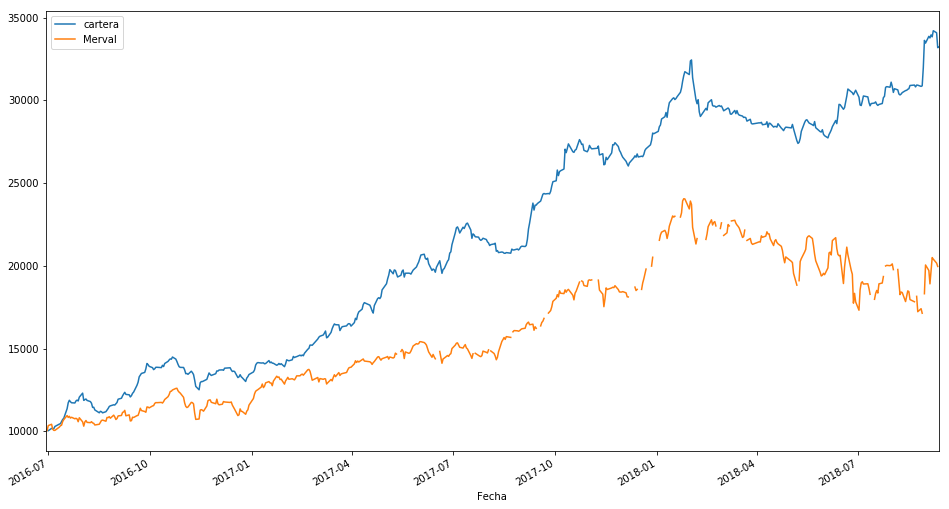

In [76]:
portfolio_variation.cumprod().plot(figsize=(16,9))
(merv * 10000.0 / merv.iloc[0]).plot()
plt.legend(['cartera', 'Merval'])